**Importing the necessary libraries:**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.callbacks import EarlyStopping
from keras.datasets import mnist

Using TensorFlow backend.


**Loading the mnist dataset:**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


**Reshaping the training data to represent one - channel image input:**

In [0]:
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

**Normalizing the input data:**

In [0]:
X_train = X_train.astype('float32') / 255.

X_test = X_test.astype('float32') / 255.

**One - hot encoding the labels:**

In [0]:
n_classes = len(set(y_train))

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

**Defining the CNN architecture:**

In [6]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu',
                 input_shape = input_shape))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Setting the network hyperparameters:**

In [0]:
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 5)]

**Training the model:**

In [8]:
n_epochs = 200
batch_size = 128

model.fit(X_train, y_train, 
          batch_size = batch_size,
          epochs = n_epochs,
          verbose = 1,
          validation_split = 0.2,
          callbacks = callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 46s 948us/step - loss: 0.1986 - acc: 0.9404 - val_loss: 0.0540 - val_acc: 0.9832
Epoch 2/200
48000/48000 [==============================] - 40s 832us/step - loss: 0.0699 - acc: 0.9794 - val_loss: 0.0439 - val_acc: 0.9880
Epoch 3/200
48000/48000 [==============================] - 40s 832us/step - loss: 0.0502 - acc: 0.9847 - val_loss: 0.0412 - val_acc: 0.9890
Epoch 4/200
48000/48000 [==============================] - 40s 831us/step - loss: 0.0406 - acc: 0.9874 - val_loss: 0.0363 - val_acc: 0.9902
Epoch 5/200
48000/48000 [==============================] - 40s 829us/step - loss: 0.0327 - acc: 0.9901 - val_loss: 0.0344 - val_acc: 0.9912
Epoch 6/200
48000/48000 [==============================] - 40s 829us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0436 - val_acc: 0.9892
Epoch 7/200
48000/48000 [==============================] - 40s

**Showing the results on the test set:**

Test loss:  0.028865059850092255
Test accuracy:  0.9931


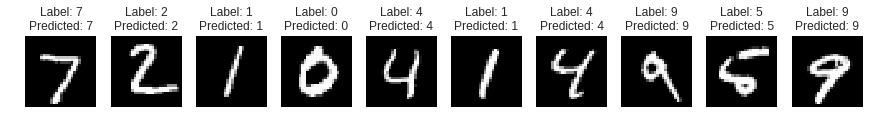

In [11]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

# Extract predictions
preds = model.predict(X_test)

n_examples = 10
plt.figure(figsize = (15, 15))
for i in range(n_examples):
  ax = plt.subplot(2, n_examples, i + 1)
  plt.imshow(X_test[i, :, :, 0], cmap = 'gray')
  plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]),
                                              np.argmax(preds[i])))
  plt.axis('off')

plt.show()

# 10 examples of the truth labels, predicted labels, and input image

**Plotting the misclassified images and their labels:**

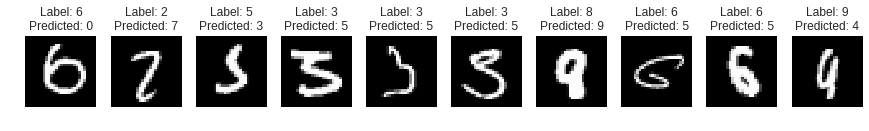

In [12]:
plt.figure(figsize = (15, 15))

j = 1
for i in range(len(y_test)):
  if(j > 10):
    break
  label = np.argmax(y_test[i])
  pred = np.argmax(preds[i])
  if label != pred:
    ax = plt.subplot(2, n_examples, j)
    plt.imshow(X_test[i, :, :, 0], cmap = 'gray')
    plt.title("Label: {}\nPredicted: {}".format(label, pred))
    plt.axis('off')
    j += 1
plt.show()

# 10 examples of misclassified images